Siklus Analisis Data:
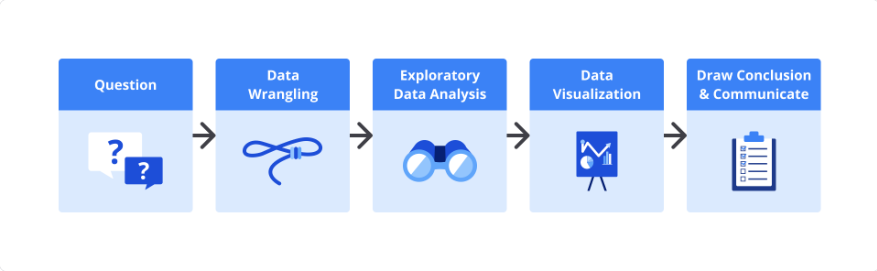



1. Mendefinisikan Pertanyaan <br>
Dengan mendefinisikan pertanyaan, ini akan membantu kita dalam memahami masalah bisnis yang dihadapi serta tujuan yang ingin dicapai. Gunakan konsep 4W (What, When, Why, Where)
2. Data Wrangling <br>
Kumpulkan data dari berbagai sumber, menilai kualitas dan struktur data tersebut serta membuat strategi pembersihan data yang sesuai.
3. Exploratory Data Analysis <br>
Data yang sudah dibersihkan akan dieksplorasi untuk memperoleh insight dan menjawab pertanyaan analisis. Eksplorasi umumnya dengan memanfaatkan teknik descriptive statistics untuk menemukan pola, hubungan, serta membangun intuisi terkait data yang diolah.
4. Data Visualization <br>
Hasil yang diperoleh oleh EDA perlu divisualisasikan agar temuan atau insight dapat di komunikasikan.
5. Draw Conclusion & communicate <br>
Membuat kesimpulan dari hasil analisis, kesimpulan tersebut harus menjawab semua pertanyaan dan tujuan yang telah didefinisikan diawal. Temuan yang didapatkan kemudian dibagikan untuk dikomunikasikan



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Data Gathering
Mengumpulkan data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis.

In [4]:
customers_df = pd.read_csv("Dataset/customers.csv")
customers_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/customers.csv'

In [ ]:
orders_df = pd.read_csv("Dataset/orders.csv")
orders_df.head()

In [ ]:
products_df = pd.read_csv("Dataset/products.csv")
products_df.head()

In [ ]:
sales_df = pd.read_csv("Dataset/sales.csv")
sales_df.head()

### Assessing Data


Menilai kualitas data yang akan digunakan, melihat permasalahan yang ada dalam data


#### Data Customers


In [ ]:
customers_df.info()

Adanya missing value pada kolom gender (989 non-null object)


In [ ]:
customers_df.isna().sum()

In [ ]:
print("Check duplicated data: ", customers_df.duplicated().sum())

In [ ]:
customers_df.describe()

dalam kolom age terlihat bahwa umur maksimal 700, ini merupakan sebuah kesalahan.


#### Data Orders


In [ ]:
orders_df.info()

Kesalahan tipe data pada kolom order date dan delivery date, harusnya bertipe datetime


In [ ]:
print("Check duplicated data: ", orders_df.duplicated().sum())

In [ ]:
orders_df.describe()

#### Data Products


In [ ]:
products_df.info()

In [ ]:
print("Check duplicated data: ", products_df.duplicated().sum())

In [ ]:
products_df.describe()

#### Data Sales


In [ ]:
sales_df.info()

Adanya missing value dalam kolom total price.


In [ ]:
sales_df.isna().sum()

In [ ]:
print("Check duplicated data: ", sales_df.duplicated().sum())

In [ ]:
sales_df.describe()

### Temuan Data

#### 1. customer_df
- Terdapat **18 missing value** pada kolom `gender`.
- Terdapat **6 data duplikat**.
- Terdapat **inaccurate value** pada kolom `age`.

#### 2. orders_df
- Terdapat **kesalahan tipe data** pada kolom `order_date` dan `delivery_date`.

#### 3. product_df
- Terdapat **6 data duplikat**.

#### 4. sales_df
- Terdapat **19 missing value** pada kolom `total_price`.

### Cleaning Data


#### Data Customers


In [ ]:
customers_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Dalam menangani missing value terdapat tiga buah metode (dropping, imputation, dan interpolation). Gunakan teknik filtering untuk melihat data dengan missing value tersebut.


In [ ]:
customers_df[customers_df.gender.isna()]

baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value. Kolom gender merupaakn kolom Kategorik, maka dari itu nilai dominan akan digunakan sebgai pengganti missing value.


In [ ]:
customers_df.gender.value_counts()

Dapat diketahui bahwa nilai dominan dalam kolom gender adalah "Prefer not to say", gunakan value ini untuk menggantikan missing value.


In [ ]:
customers_df.fillna(value="Prefer not to say", inplace=True)

In [ ]:
customers_df.isna().sum()

Dalam menangani inaccurate value dalam kolom age, kita filter dulu baris data yang mengandung nilai age maksimum.


In [ ]:
customers_df[customers_df.age == customers_df.age.max()]

Kemungkinan inaccurate value tersebut dikarenakan human error saat input kelebihan nilai 0. Ini merupakan asumsi


In [ ]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [ ]:
customers_df[customers_df.age == customers_df.age.max()]

In [ ]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [ ]:
customers_df.describe()

berdasarkan hasil describe sekarang kolom age memiliki nilai maksimum yang cukup masuk akal.


#### Data Orders


Berdasarkan tahap assesing data sebelumnya dalam data order terdapat masalah pada tipe data kolom order date dan delivery date.


In [ ]:
datetime_columns = ["order_date", "delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

#### Data Product


Berdasarkan proses assesing data, terdapat 6 data yang terduplikat dalam dataset ini.


In [ ]:
products_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_df.duplicated().sum())

#### Data Sales


Berdasarkan proses assesing data sebelumnya terdapat 19 missing value dalam kolom total price.


In [ ]:
sales_df[sales_df.total_price.isna()]

dari informasi tersebut total price adalah hasil perkalian antara price per unit dan quantity.


In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [ ]:
sales_df.isna().sum()

## Exploratory Data Analysis


Pertanyaan bisnis:

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


### Eksplorasi `customer_df`

In [ ]:
customers_df.describe(include="all")

1001 orang yang berumur di kisaran antara 20 hingga 80 tahun dengan rata-rata umur sebesar 49.87 tahun dengan standar deviasinya sebesar 17.64 tahun. Artinya sebagian besar umur pelanggan berbeda sekitar 17.64 tahun dari rata rata umur dalam dataset.


In [ ]:
customers_df.groupby(by="gender").agg({
  "customer_id" : "nunique",
  "age" : ["max", "min", "mean", "std"]
})

In [ ]:
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

In [ ]:
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

Dapat dilihat bahwa persebaran pelanggan cukup rata di setiap kota dan negara bagian.


In [ ]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [ ]:
orders_df.head()

In [ ]:
orders_df.describe(include="all")

rata rata pengiriman 14 hari dengan maksimal pengiriman 27 hari dan minimal sebesar 1 hari


### Eksplorasi `order_df`


Dalam data order_df terdapat customer_id, sehingga hal ini dapat dikaitkan untuk mengidentifikasi pelanggan yang belum pernah melakukan order. Bentuk sebuah kolom baru dengan nama "status" dengan value "active" untuk pelanggan yang pernah melakukan order dan "non active" untuk yang belum pernah melakukan order.


In [ ]:
# Petakan semua customers_id dalam orders_df ke dalam variabel untuk dilakukan pengecekan lebih lanjut
customers_id_in_orders_df = orders_df.customer_id.tolist()
# Tambahkan kolom baru dalam customer_df yang akan bernilai Active jika customer_id dalam customer_df ada dalam daftar list customers_id_in_orders_df.
customers_df["status"] = customers_df["customer_id"].apply(lambda x : "Active" if x in customers_id_in_orders_df else "Non Active")
customers_df.sample(5)

In [ ]:
customers_df.groupby(by="status").customer_id.count()

Cukup banyak orang yang belum pernah melakukan transaksi


In [ ]:
orders_customers_df = pd.merge(
  left=orders_df,
  right=customers_df,
  how="left",
  left_on="customer_id",
  right_on="customer_id"
)

In [ ]:
orders_customers_df.head()

In [ ]:
#Jumlah order berdasarkan kota
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

kota Jordanside dan New Ava merupakan dua kota yang memiliki jumlah order terbanyak

In [ ]:
#Jumlah order berdasarkan negara bagian
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

In [ ]:
#Jumlah order berdasarkan gender
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

In [ ]:
#Jumlah order berdasarkan kelompok usia
orders_customers_df["age_group"] = orders_customers_df["age"].apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

pelanggan yang paling banyak melakukan order berasal dari kelompok usia Adults.

In [ ]:
products_df.describe(include="all")

In [ ]:
sales_df.describe(include="all")

Harga barang yang dijual berkisar 90 hingga 119 dollar. informasi lain yang tidak kalah menarik yaitu pada setiap transaksi pelanggan paling banyak membeli tiga buah item dalam satu jenis produk dengan total harga sebesar 357 dolar.

In [ ]:
products_df.sort_values(by="price", ascending=False)

In [ ]:
products_df.groupby(by="product_type").agg({
  "product_id": "nunique",
  "quantity": "sum",
  "price":  ["min", "max"]
})

In [ ]:
products_df.groupby(by="product_name").agg({
  "product_id": "nunique",
  "quantity": "sum",
  "price": ["min", "max"]
})

In [ ]:
# Produk paling laris
sales_product_df = pd.merge(
  left=sales_df,
  right=products_df,
  how="left",
  left_on="product_id",
  right_on="product_id"
)

sales_product_df.head()

In [ ]:
# coba melihat informasi penjualan produk berdasarkan tipenya
sales_product_df.groupby(by="product_type").agg({
  "sales_id": "nunique",
  "quantity_x": "sum",
  "total_price": "sum"
})

In [ ]:
# melihat informasi penjualan berdasarkan nama produk
sales_product_df.groupby(by="product_name").agg({
  "sales_id": "nunique",
  "quantity_x": "sum",
  "total_price": "sum"
})

In [ ]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

In [ ]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

In [ ]:
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

In [ ]:
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

## Data Visualization

In [ ]:
all_df.head()

1. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
Buat dataframe untuk menampung informasi terkjait jumlah order dan total revenue yang diperoleh tiap bulan

In [ ]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
  "order_id": "nunique",
  "total_price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

2. Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
Buat dataframe baru untuk menampung informasi terkait jumlah pejualan tiap produk

In [ ]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='quantity_x', y='product_name', data=sum_order_items_df.head(5), palette=colors, ax=ax[0]) #ax[0] adalah object kanvas kiri
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

3. Bagaimana Demografi Pelanggan yang Kita Miliki?
Buat dataframe untuk menampung informasi terkait jumlah pelanggan untuk demografi tertentu.

In [ ]:
bygender_df = all_df.groupby(by='gender').customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bygender_df

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df

In [ ]:
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])

plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

RFM analisis
mengelompokkan pelanggan ke dalam beberapa kategori berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

In [ ]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()